<a href="https://colab.research.google.com/github/prabhintern/End-To-End-Data-Analysis-using-Python/blob/main/End_To_End_Data_Analysis(Hotel_Booking).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',500)

In [ ]:
#Reading and Inspection
hotel = pd.read_csv("hotel_bookings 2.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [ ]:
print(hotel.shape)

(119390, 32)


In [ ]:
#let's look at the statistical aspects of the dataframes
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

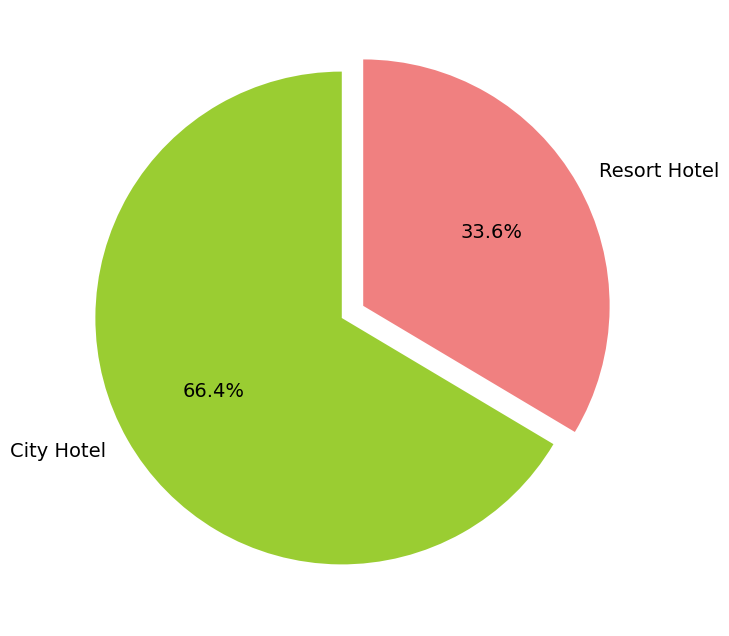

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()


In [ ]:
#Checking the missing values in the columns
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Column-wise null percentage
print(round(100*(hotel.isnull().sum()/len(hotel.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [ ]:
hotel=hotel.drop(['agent','company'],axis=1)

In [ ]:
hotel = hotel.dropna(axis = 0)

In [ ]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
hotel.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays',
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [ ]:
#Identify Continuous and Categorical Variables
def var(hotel):
    unique_list = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      |
                                   (unique_list.name=='Country')  |
                                   (unique_list.name=='Agent')
                                  ])
    con_var = total_var - cat_var

    return cat_var, con_var


cat_var, con_var = var(hotel)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Continuous Variables ( 12 )
 {'WaitingDays', 'PrevBook', 'WeekendStay', 'LeadTime', 'ADR', 'ChangeBooking', 'ArrivingDate', 'PrevCancel', 'WeekStay', 'ReservationDate', 'ArrivingWeek', 'Adults'} 

Categorical Variables( 18 )
 {'Hotel', 'RepeatGuest', 'ParkSpace', 'Children', 'Canceled', 'DepositType', 'BookRoomType', 'Reservation', 'DistChannel', 'Meal', 'CustomerType', 'AssignRoomType', 'Segment', 'Babies', 'ArrivingMonth', 'ArrivingYear', 'Country', 'SpecialRequest'}


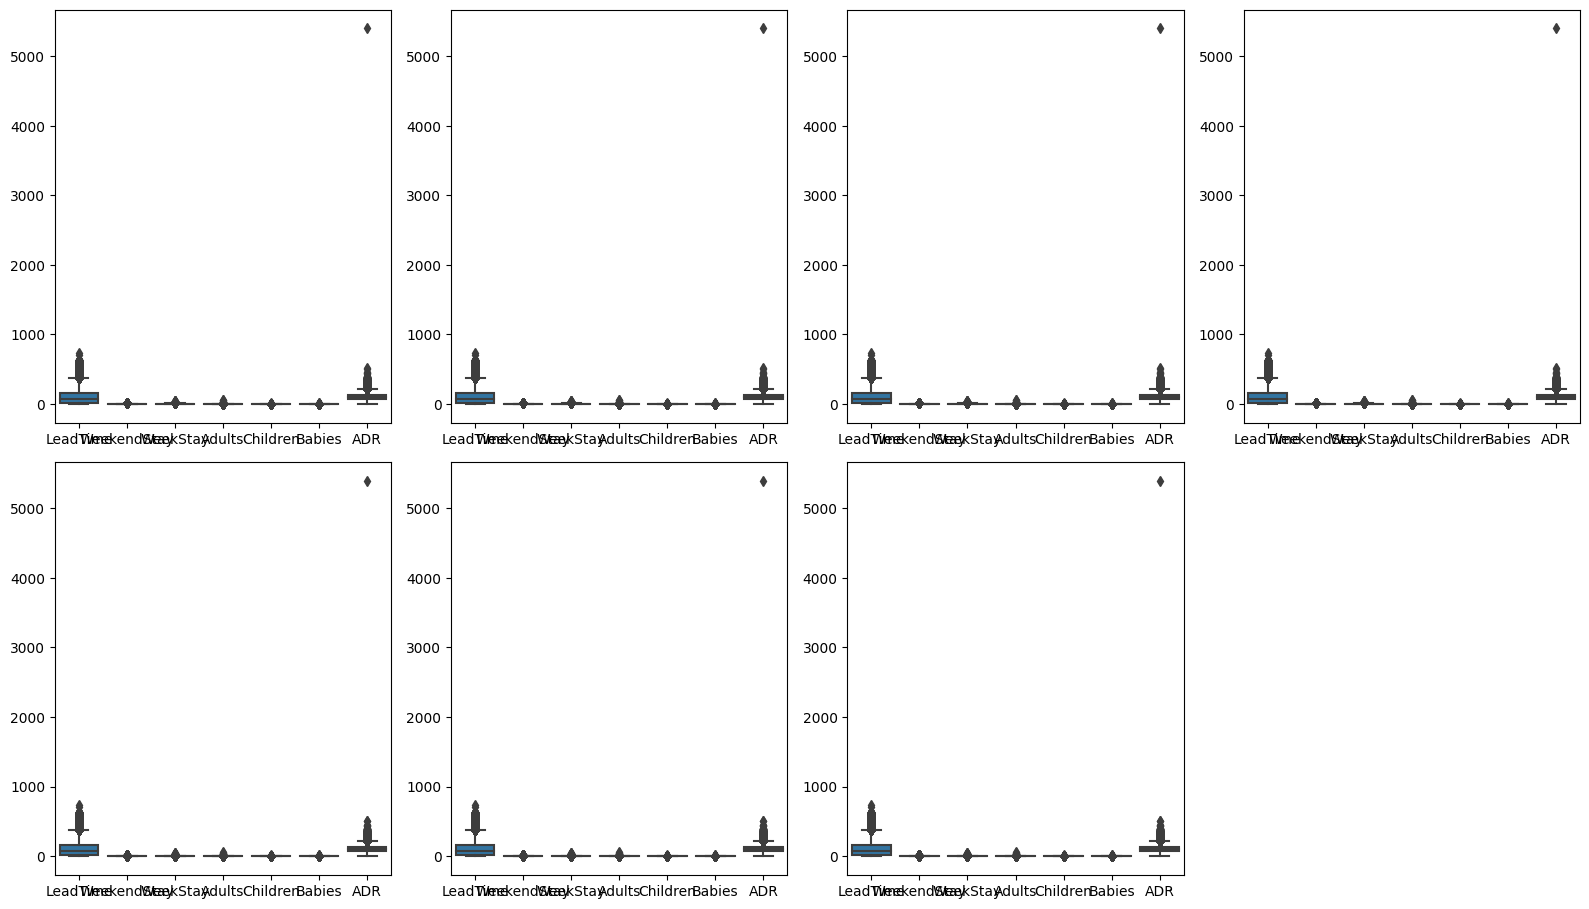

In [ ]:
#Checking the outliers
# Creating a boxplot for Outlier detection
features = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults','Children', 'Babies','ADR']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(hotel[features])
    n+=1
    plt.tight_layout()

In [ ]:
#Checking outliers in continuous variables
hotel[con_var].describe()

,WaitingDays,PrevBook,WeekendStay,LeadTime,ADR,ChangeBooking,ArrivingDate,PrevCancel,WeekStay,ArrivingWeek,Adults
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,2.330754,0.131634,0.928897,104.311435,102.003243,0.221181,15.800880,0.087142,2.502145,27.166555,1.858391
std,17.630452,1.484672,0.996216,106.903309,50.485862,0.652785,8.780324,0.845869,1.900168,13.589971,0.578576
min,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,18.000000,70.000000,0.000000,8.000000,0.000000,1.000000,16.000000,2.000000
50%,0.000000,0.000000,1.000000,69.000000,95.000000,0.000000,16.000000,0.000000,2.000000,28.000000,2.000000
75%,0.000000,0.000000,2.000000,161.000000,126.000000,0.000000,23.000000,0.000000,3.000000,38.000000,2.000000
max,391.000000,72.000000,16.000000,737.000000,5400.000000,21.000000,31.000000,26.000000,41.000000,53.000000,55.000000


In [ ]:
#Imputing the outliers(for Continuous Variable)
hotel.loc[hotel.LeadTime      > 500,'LeadTime'     ]=500
hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
con_var = set(hotel.columns) - cat_var

hotel[con_var].describe()

,WaitingDays,WeekendStay,LeadTime,ADR,ChangeBooking,ArrivingDate,WeekStay,ArrivingWeek,Adults
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.031102,0.924187,104.054543,102.003243,0.217237,15.800880,2.481581,27.166555,1.855607
std,0.173595,0.967762,105.834923,50.485862,0.602693,8.780324,1.760766,13.589971,0.488194
min,0.000000,0.000000,0.000000,-6.380000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,18.000000,70.000000,0.000000,8.000000,1.000000,16.000000,2.000000
50%,0.000000,1.000000,69.000000,95.000000,0.000000,16.000000,2.000000,28.000000,2.000000
75%,0.000000,2.000000,161.000000,126.000000,0.000000,23.000000,3.000000,38.000000,2.000000
max,1.000000,5.000000,500.000000,5400.000000,5.000000,31.000000,10.000000,53.000000,4.000000


In [ ]:
#Outliers in categorical variables
hotel[cat_var].describe()


,RepeatGuest,Children,PrevCancel,ParkSpace,PrevBook,Canceled,Babies,ArrivingYear,SpecialRequest
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.032011,0.104207,0.054223,0.061885,0.028571,0.371352,0.007948,2016.157656,0.571683
std,0.176029,0.399172,0.226458,0.244172,0.166597,0.483168,0.097380,0.707459,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,1.000000
max,1.000000,10.000000,1.000000,8.000000,1.000000,1.000000,10.000000,2017.000000,5.000000


In [ ]:
hotel.loc[hotel.Babies    > 8,'Babies']    = 0
hotel.loc[hotel.ParkSpace > 5,'ParkSpace'] = 0
hotel.loc[hotel.Children  > 8,'Children']  = 0

hotel[cat_var].describe()

,RepeatGuest,Children,PrevCancel,ParkSpace,PrevBook,Canceled,Babies,ArrivingYear,SpecialRequest
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.032011,0.104123,0.054223,0.061750,0.028571,0.371352,0.007788,2016.157656,0.571683
std,0.176029,0.398139,0.226458,0.241992,0.166597,0.483168,0.089236,0.707459,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,1.000000
max,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2017.000000,5.000000


In [ ]:
#Data Prepration
#Lets combine children and babies together as kids
hotel['Kids'] = hotel.Children + hotel.Babies

#Combine total mumbers by adding kids and adults
hotel['total_members'] = hotel.Kids + hotel.Adults

In [ ]:
#convert the datatypes to string
hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')

hotel['Canceled'] = hotel['Canceled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')

In [ ]:
# Lets convert arrival date to datetime
hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

In [ ]:
confirmed_bookings = hotel[hotel.Canceled=='0']

In [ ]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64

In [ ]:
#Performing Exploratory Data Analysis
##Cancelations
print('Total Bookings canceled')
print('-'*50)
print(hotel.Canceled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(hotel.Canceled.value_counts(normalize=True))

Total Bookings canceled
--------------------------------------------------
0    74745
1    44153
Name: Canceled, dtype: int64
--------------------------------------------------
***************************************************************************
Cancelation percentage in both hotels 
--------------------------------------------------
0    0.628648
1    0.371352
Name: Canceled, dtype: float64


In [ ]:
##Country
hotel.Country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: Country, Length: 177, dtype: float64

In [ ]:
#Month
hotel.ArrivingMonth.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: ArrivingMonth, dtype: float64

In [ ]:
##Market Segment
hotel.Segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: Segment, dtype: float64

In [ ]:
##Year
hotel.ArrivingYear.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: ArrivingYear, dtype: float64

In [ ]:
#Meal
hotel.Meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: Meal, dtype: float64

In [ ]:
#Customer Type
hotel.CustomerType.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: CustomerType, dtype: float64

In [ ]:
#Transient type of customers are the more around 75 %
hotel.Reservation.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: Reservation, dtype: float64

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

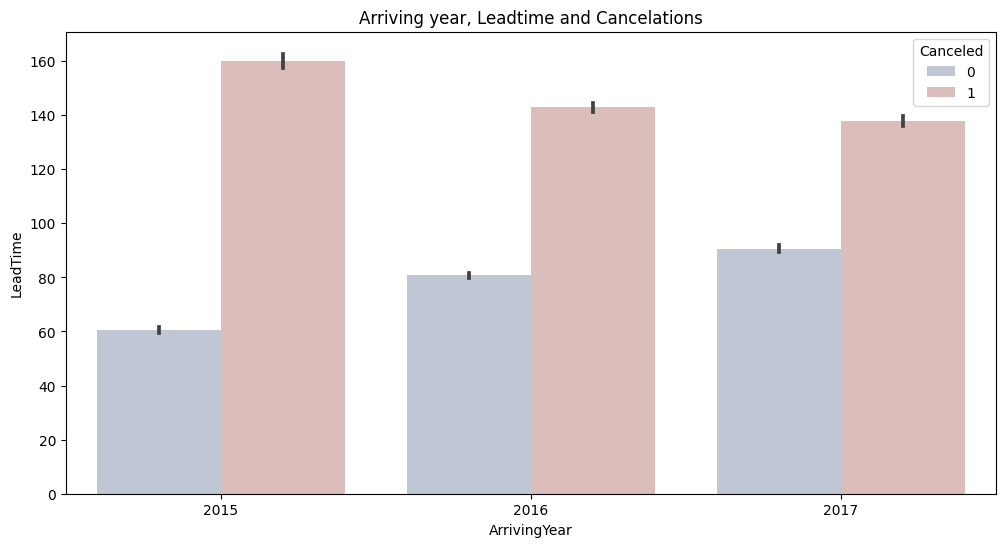

In [ ]:
#Data Visualization
plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Canceled', data= hotel, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

<Axes: >

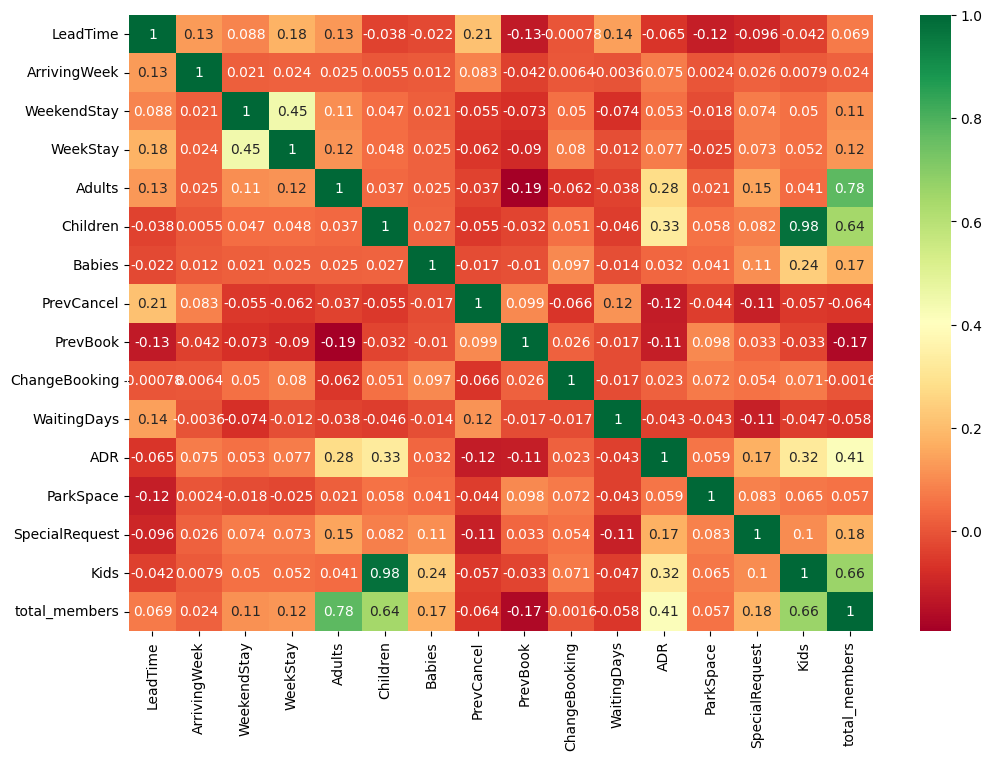

In [ ]:
#Lets see the correlation
plt.figure(figsize=(12,8))
sns.heatmap(hotel.corr(),annot=True,cmap='RdYlGn')

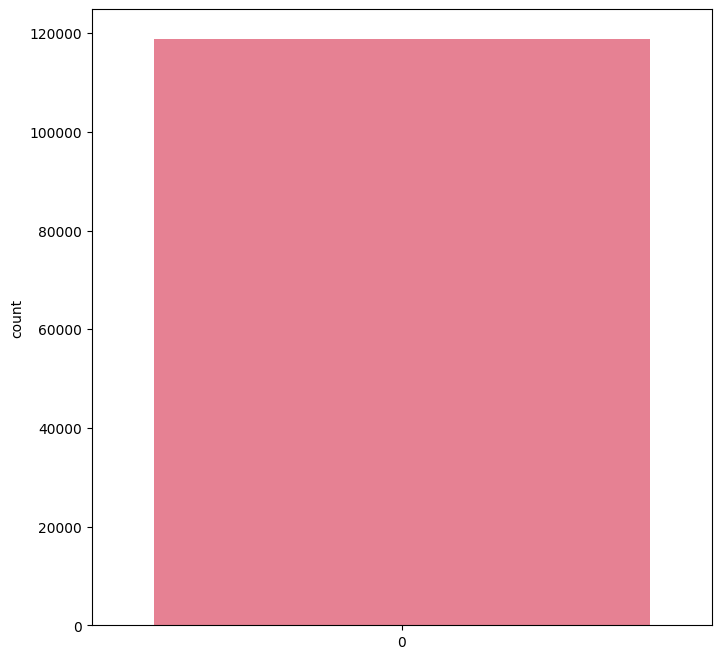

In [ ]:
### Canceled
#Canceled=1, Not canceled= 0
canceled_data = hotel['Canceled']
sns.countplot(canceled_data, palette='husl')

plt.show()

<Axes: ylabel='Canceled'>

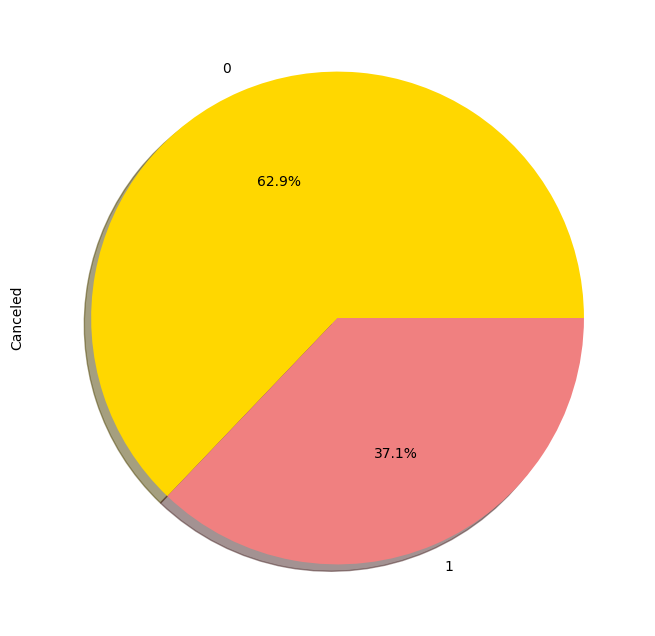

In [ ]:
#Majority of bookings were not canceled,still some half of the bookings were canceled
cols = ['gold', 'lightcoral']
hotel['Canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

In [ ]:
#According to the pie chart,63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.

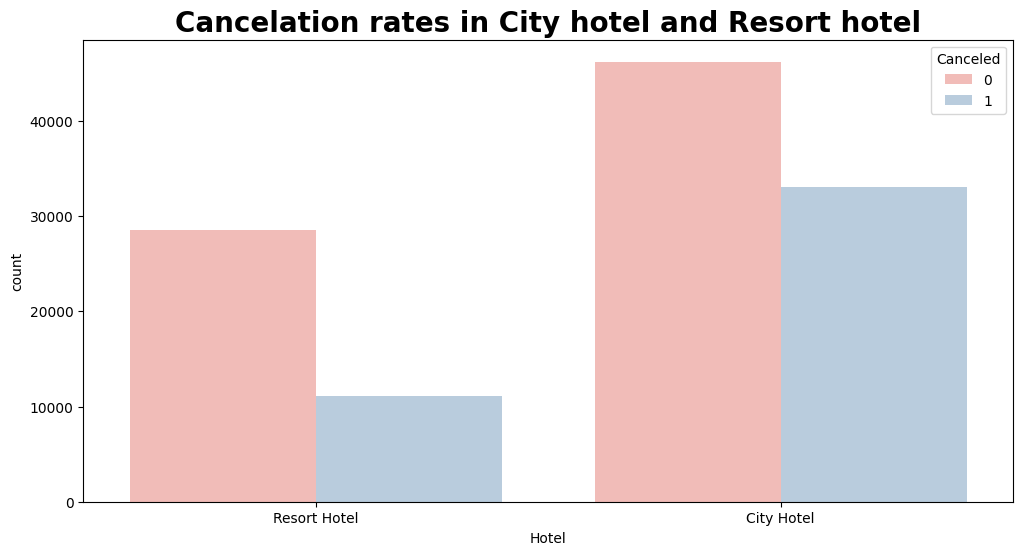

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Hotel',hue="Canceled", data=hotel,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

In [ ]:
### Most bookings were in city hotel
### Cancellations in Resort hotel is less compared to city hotel

In [ ]:
### Arrivals in month and year

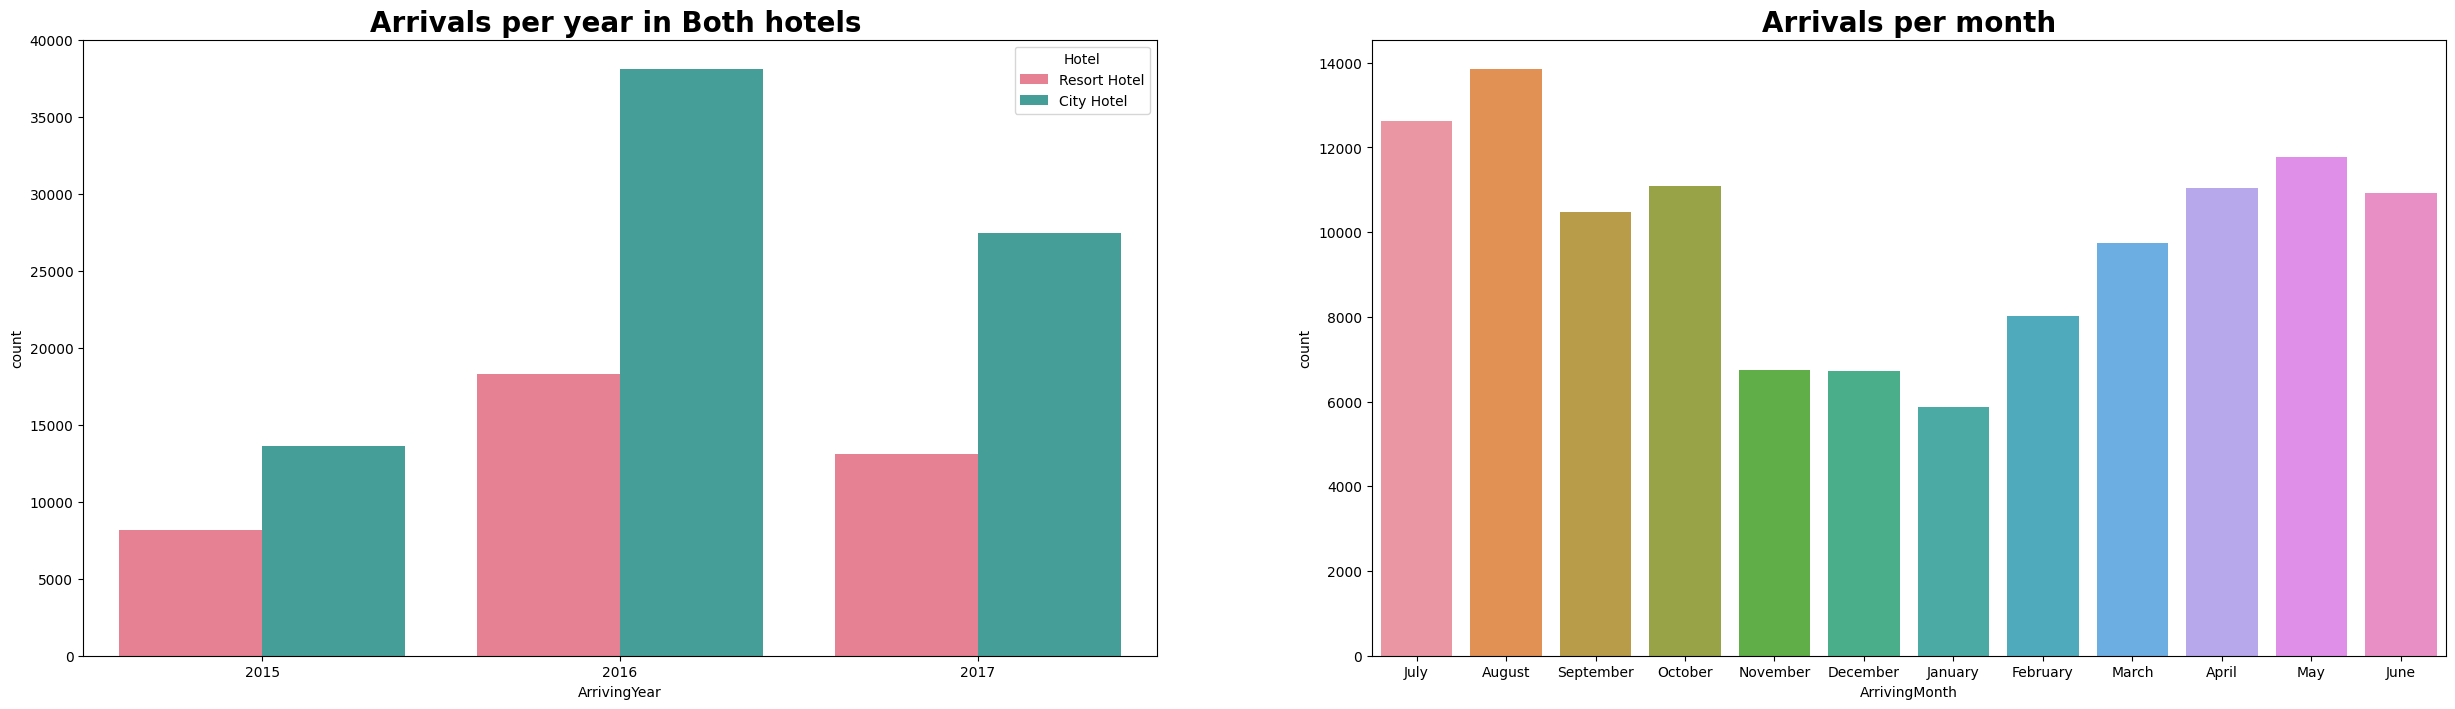

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=hotel,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'ArrivingMonth')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

In [ ]:
###We can see most  of the bookings were in the year 2016 and bookings were dont in City hotel
###Most bookings were done in the month of May,JJune,July,August

In [ ]:
###Arrival Date

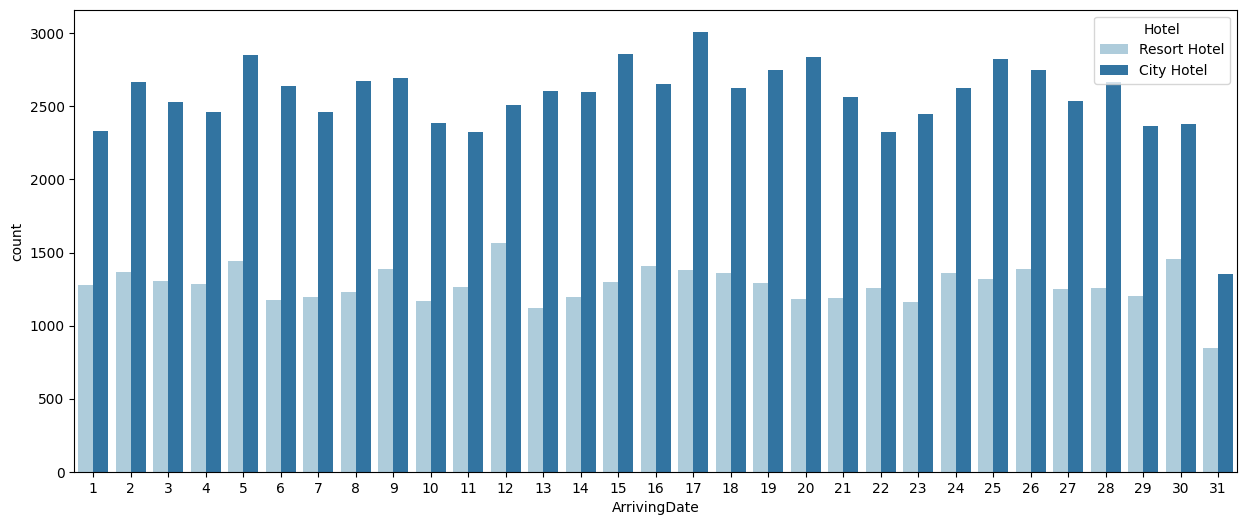

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(data = hotel, x = 'ArrivingDate', hue='Hotel', palette='Paired')
plt.show()

In [ ]:
### Month end day has very less arrivals
### Bookings are more in City hotel

In [ ]:
### Weekend Stay

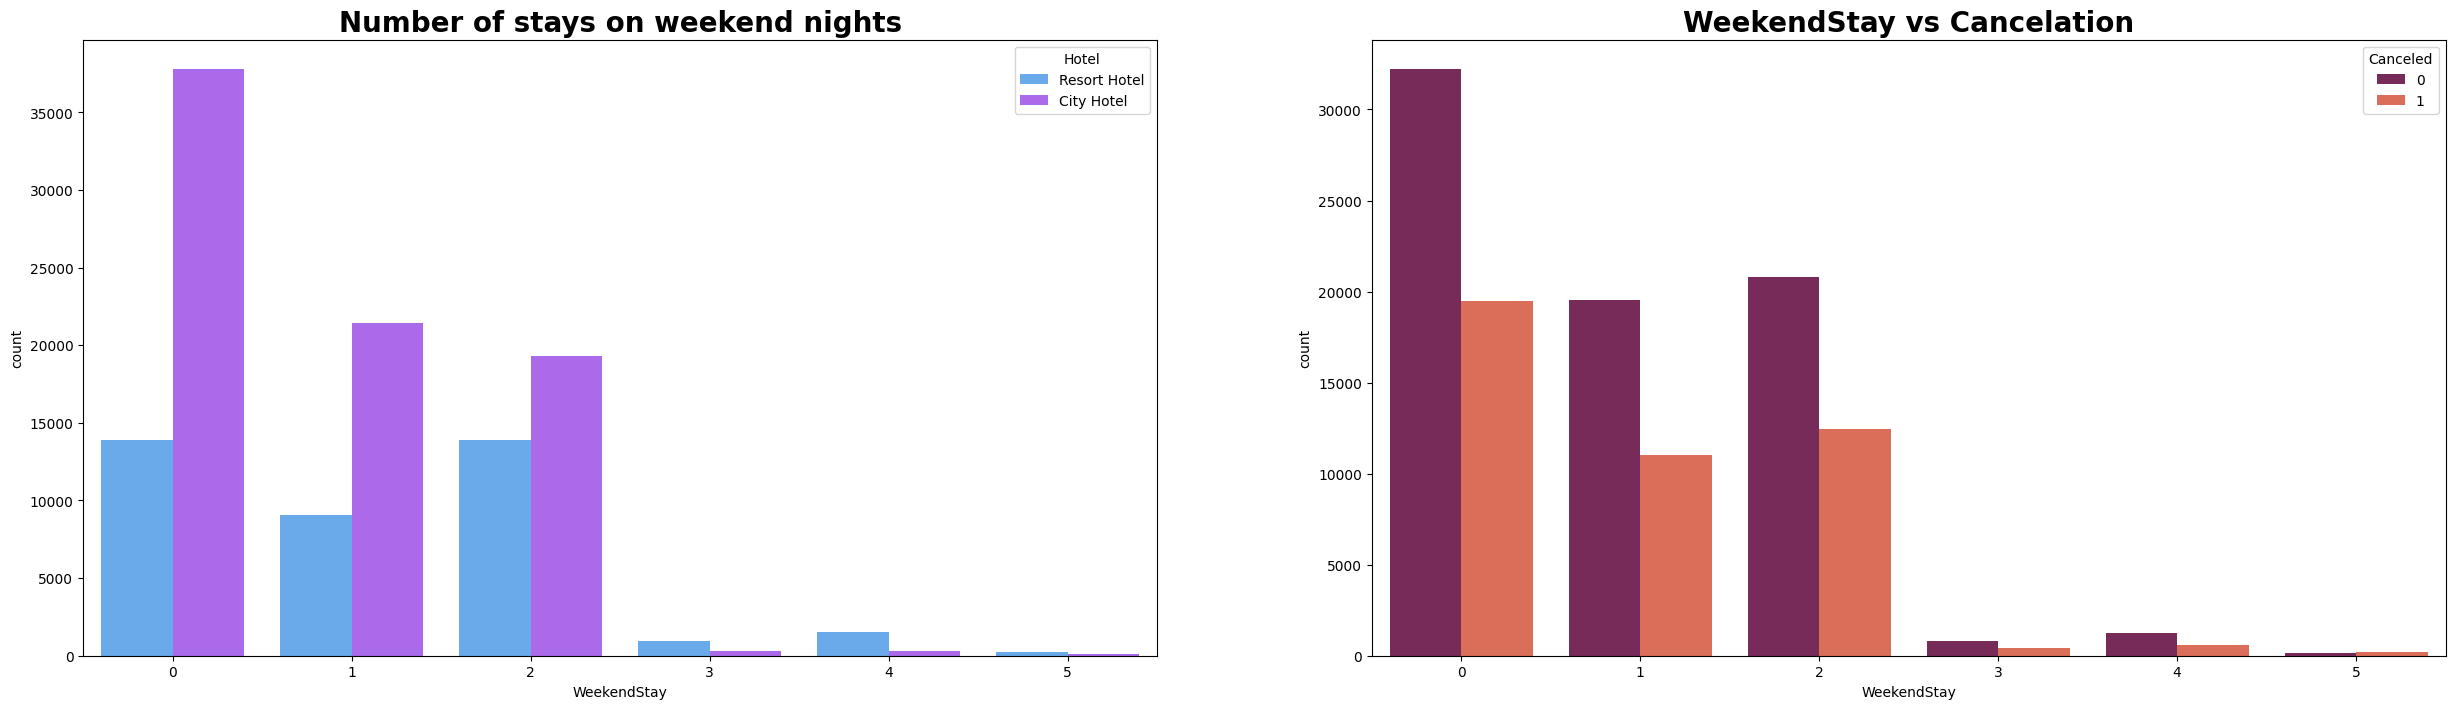

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekendStay', hue='Canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

In [ ]:
### In the first graph we can see that most of the weekend nights were booked in City Hotel
### Second plot shows most of weekend nights which were booked were not canceled

In [ ]:
###WeekStay

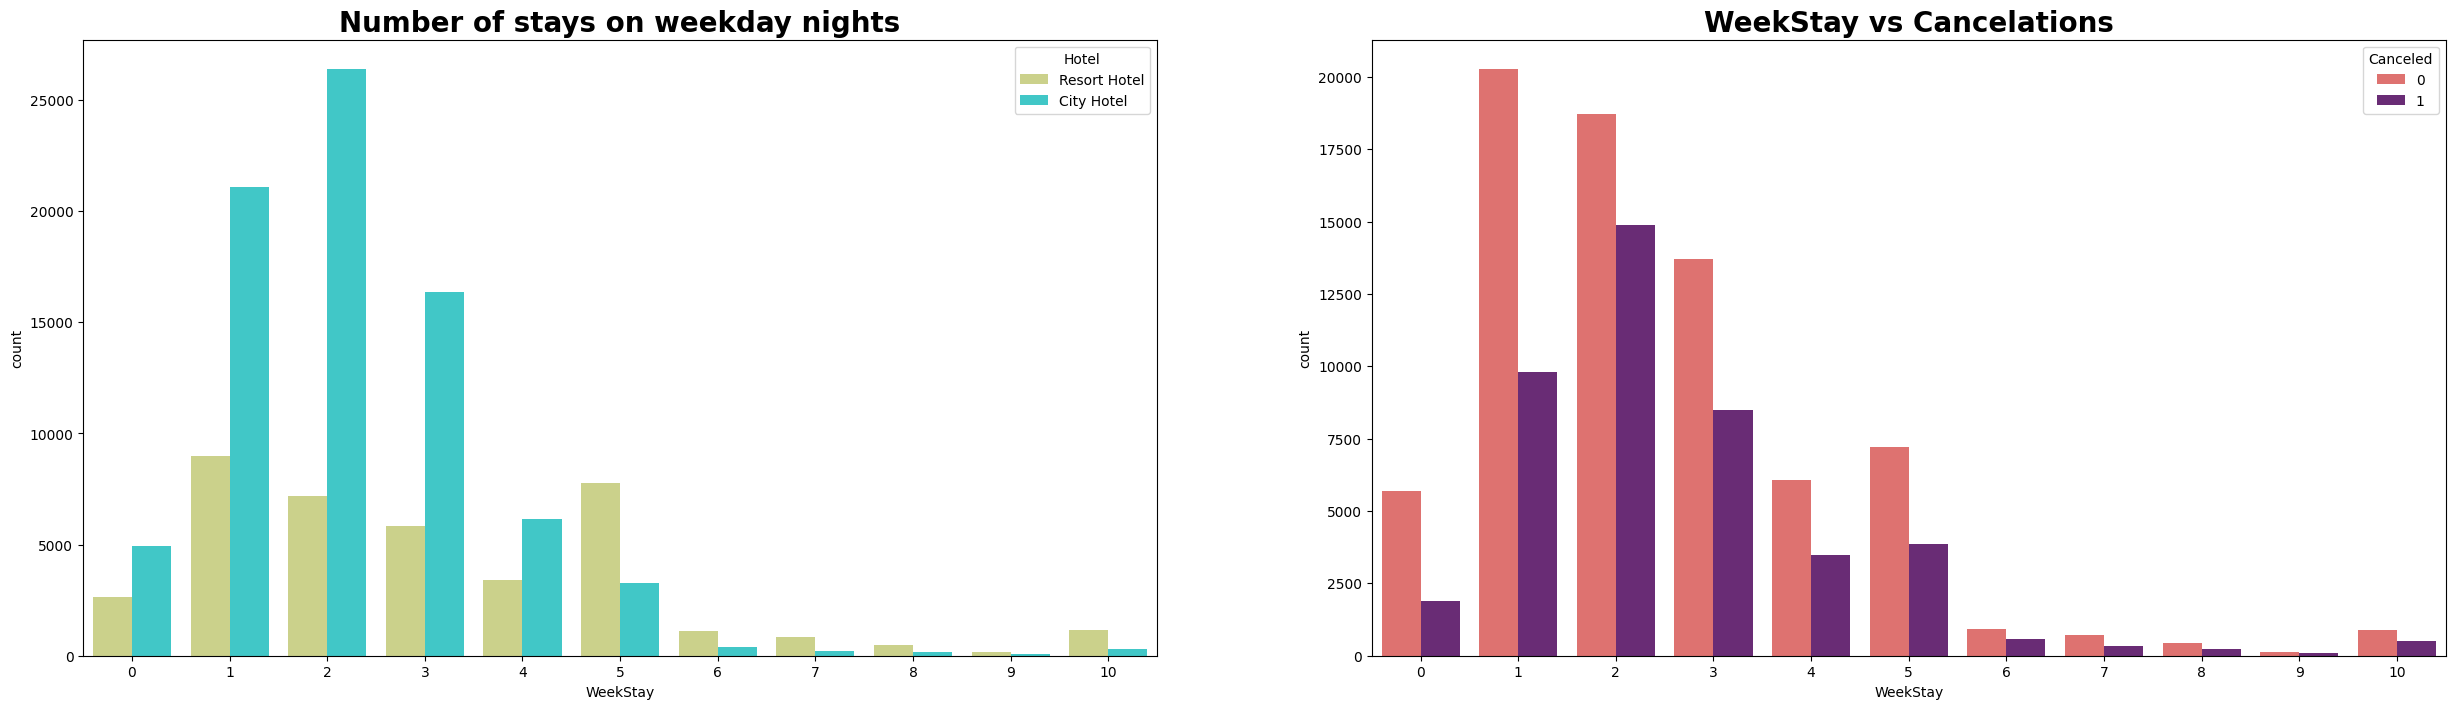

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekStay',hue='Hotel', data=hotel, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekStay', hue='Canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

In [ ]:
### Weekday night stays were more in City Hotel
### Less cancelations were observed

In [ ]:
###Adults

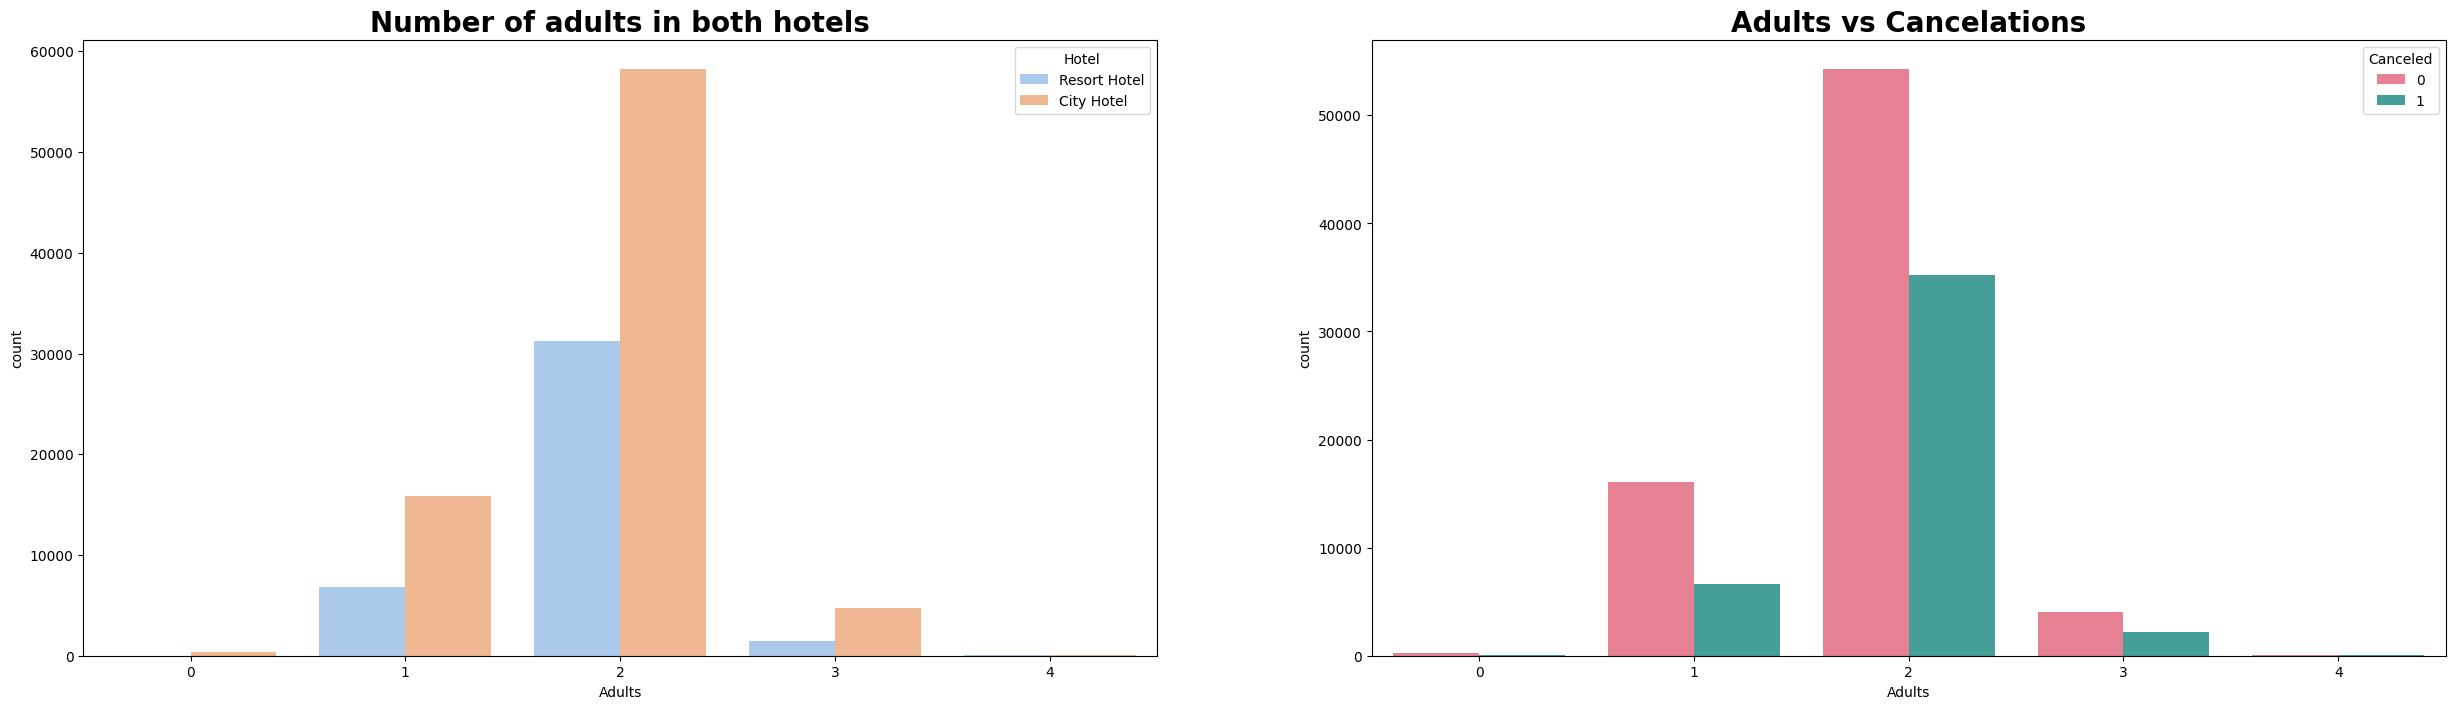

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Adults',hue='Hotel', data=hotel, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Adults', hue='Canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()


In [ ]:
### Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings

In [ ]:
###Children

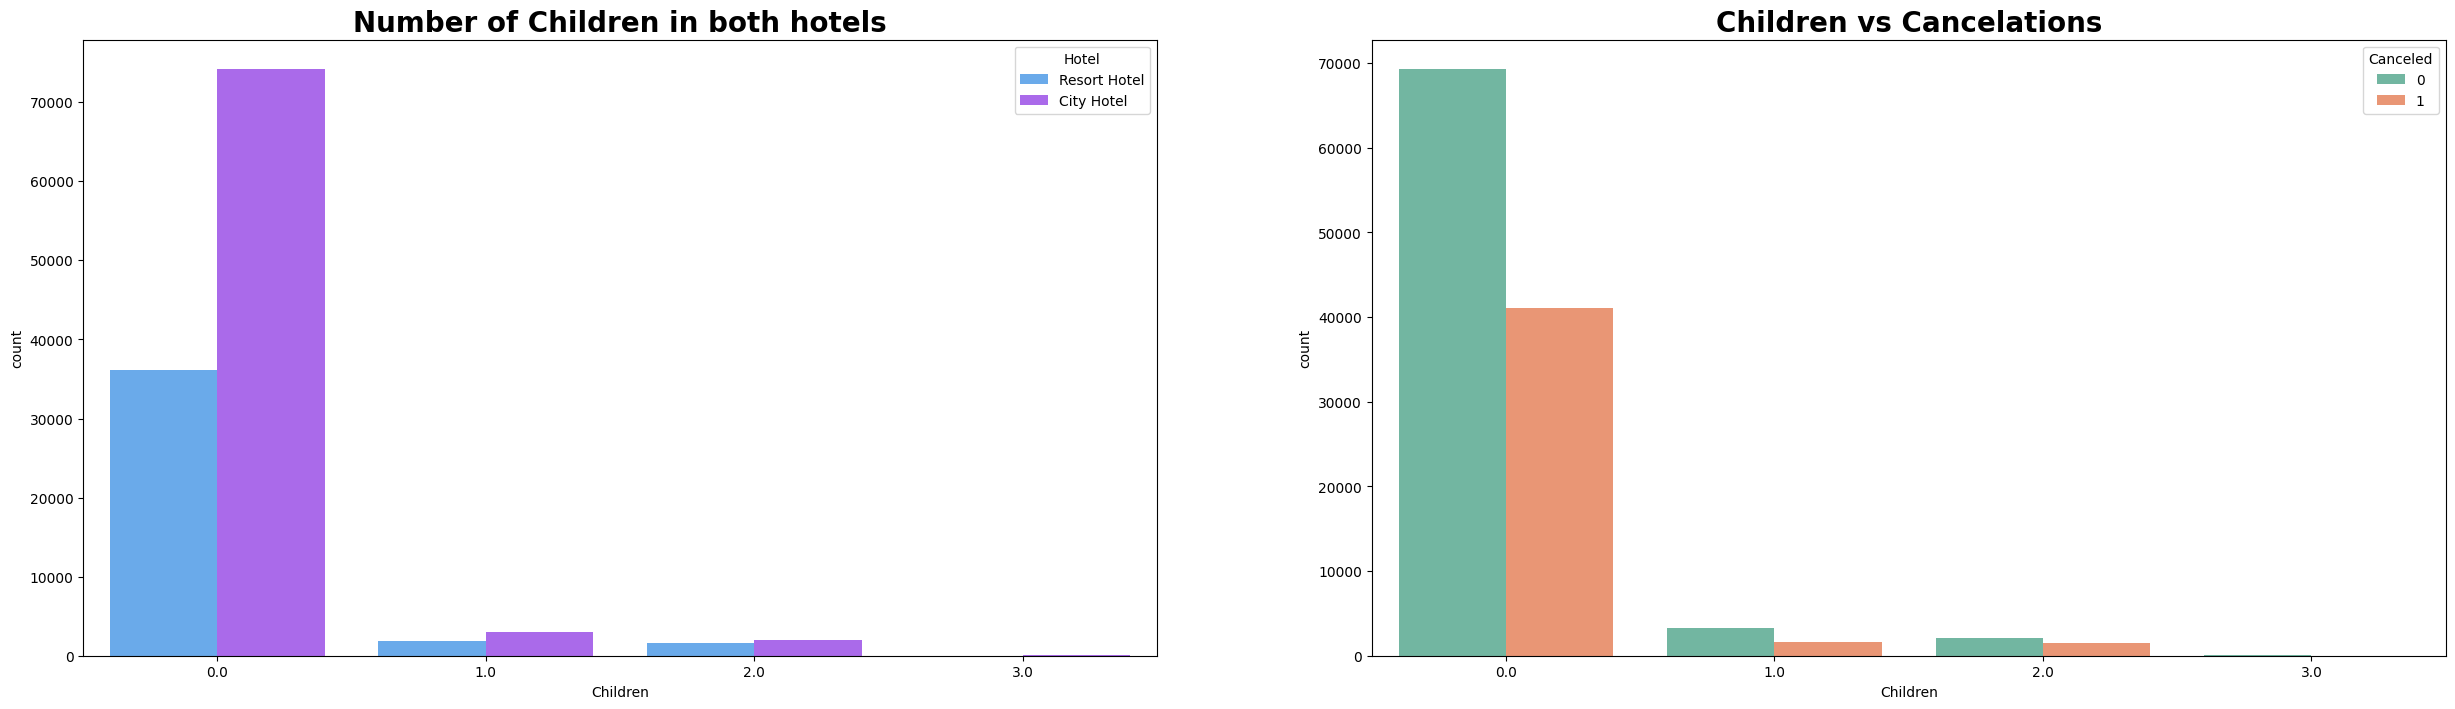

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Children',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Children', hue='Canceled', palette='Set2')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()


In [ ]:
###Babies

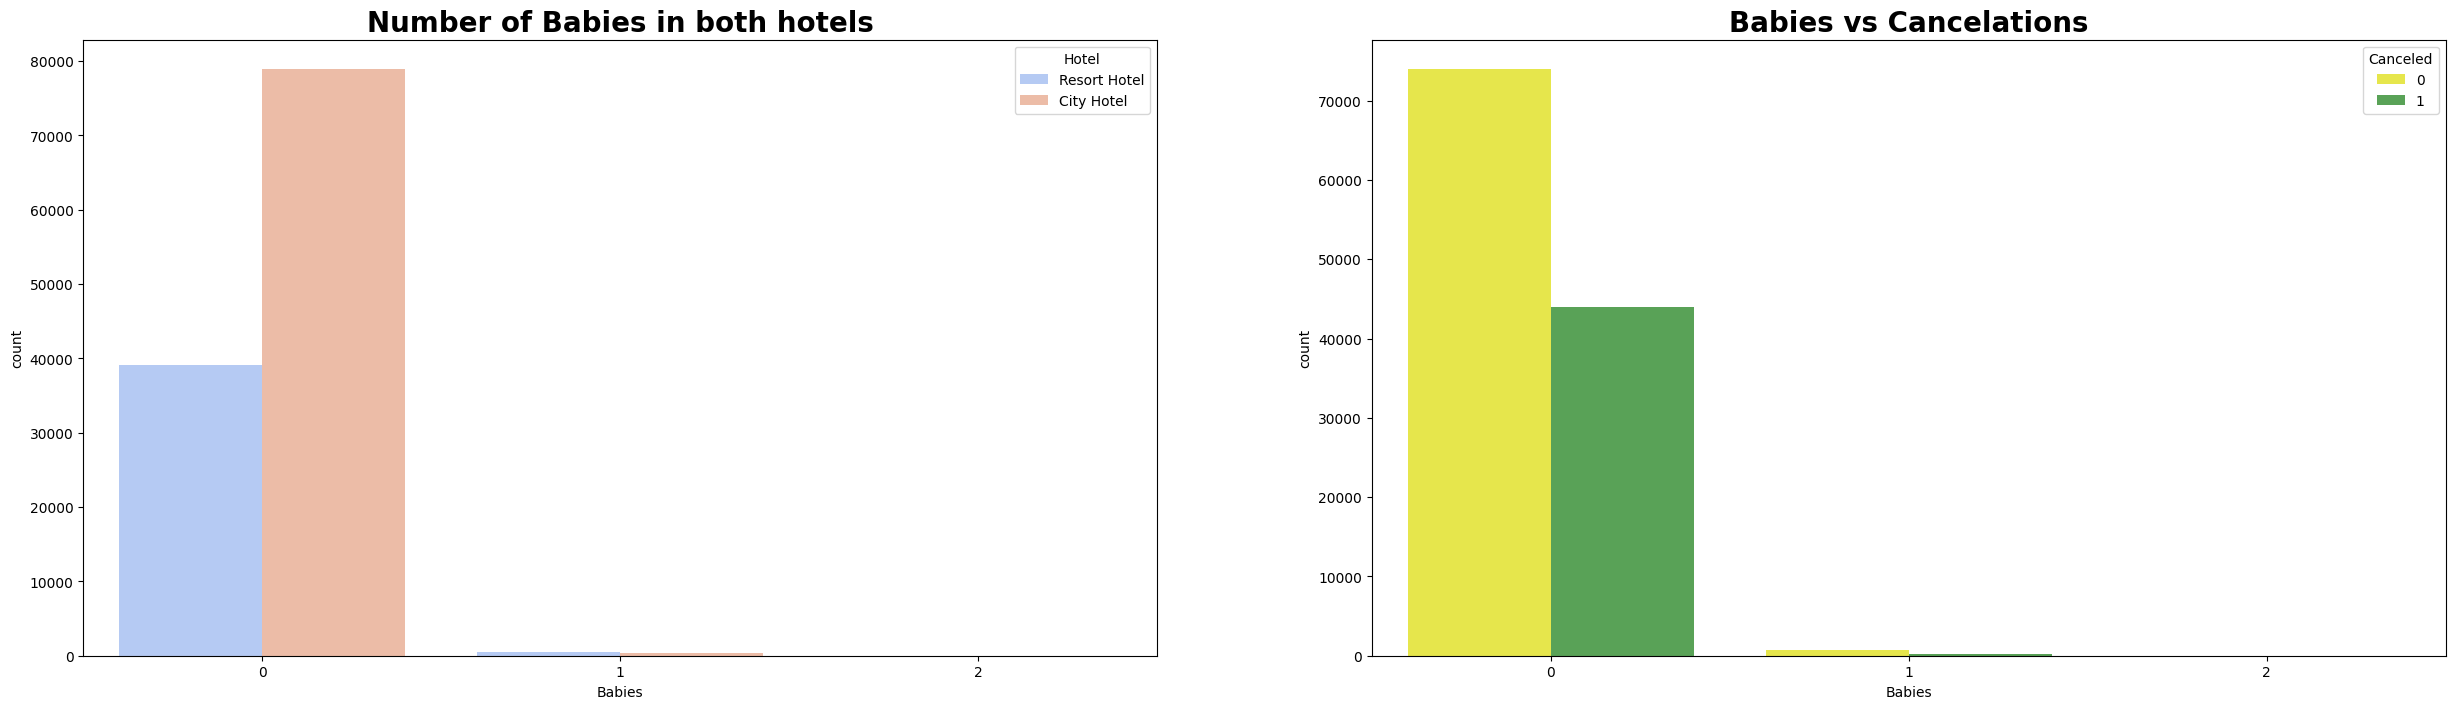

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Babies',hue='Hotel', data=hotel, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Babies', hue='Canceled', palette='Set1_r')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()


In [ ]:
### Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel
### visitors who had 1 or 2 children also preferred city hotel

In [ ]:
###Country

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
country_visitors = hotel[hotel['Canceled'] == '0'].groupby(['Country']).size().reset_index(name = 'count')


import plotly.express as px

px.choropleth(country_visitors,
                    locations = "Country",
                    color= "count" ,
                    hover_name= "Country", # column to add to hover information
                    color_continuous_scale="Viridis",
                    title="Home country of visitors")

In [ ]:
### More visitors are from western europe, namely France,UK and Portugal being the highest.

In [ ]:
###Market

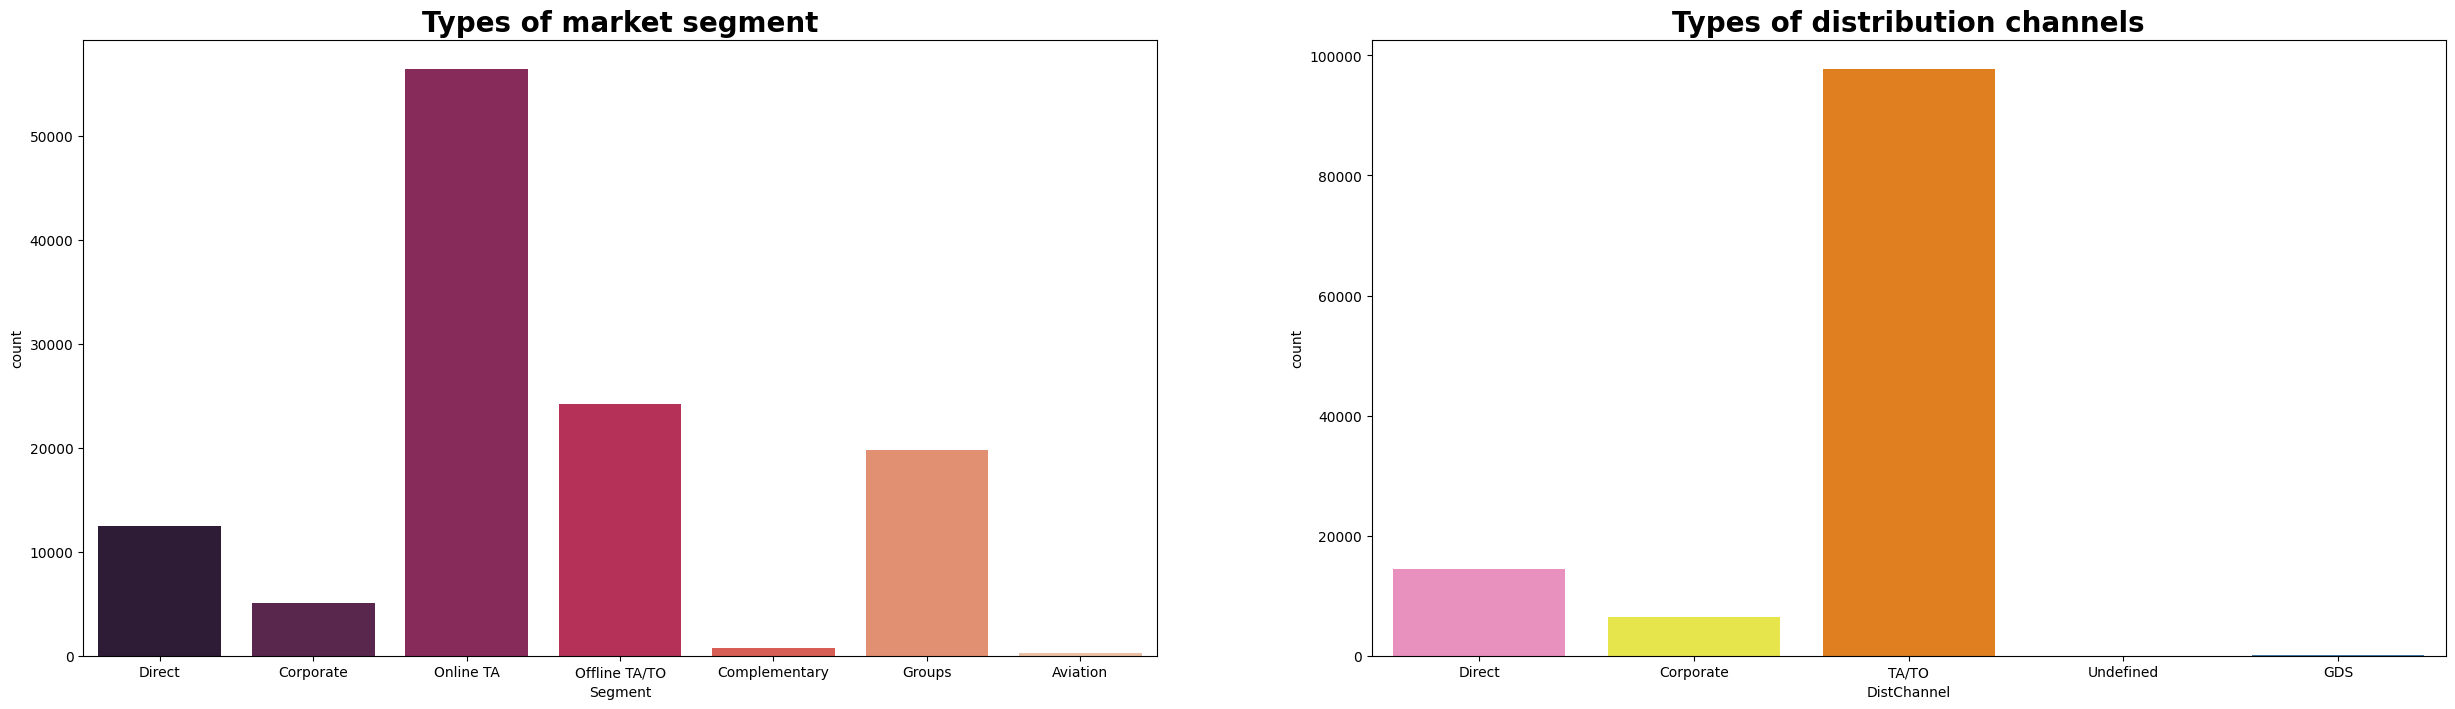

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment', data=hotel, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'DistChannel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

In [ ]:
### Majority DIstribution channels and Market segment were Travel agencies wither offline/online. So better focus more on this

In [ ]:
###Deposit

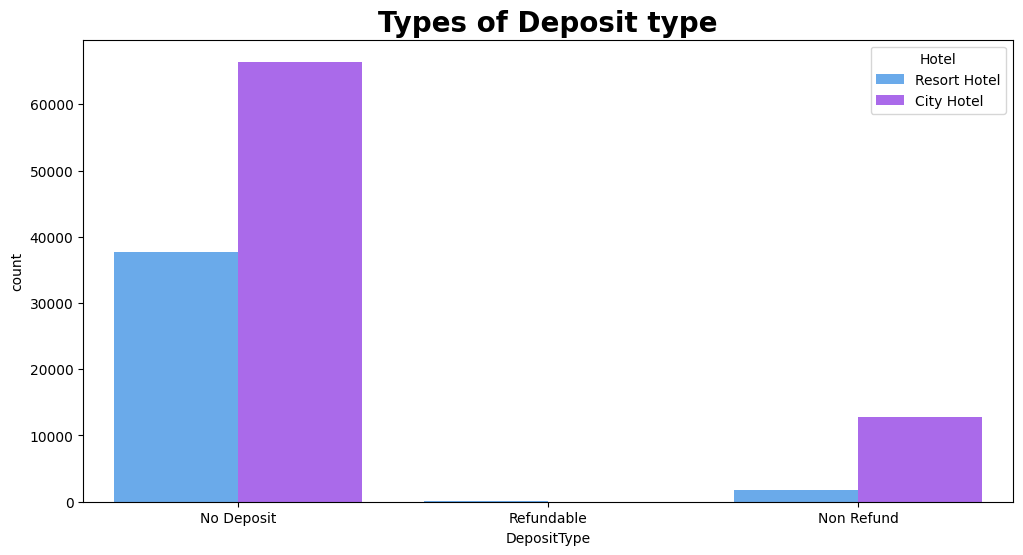

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data = hotel, x = 'DepositType',hue='Hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

In [ ]:
### There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings

In [ ]:
###Repeat guest

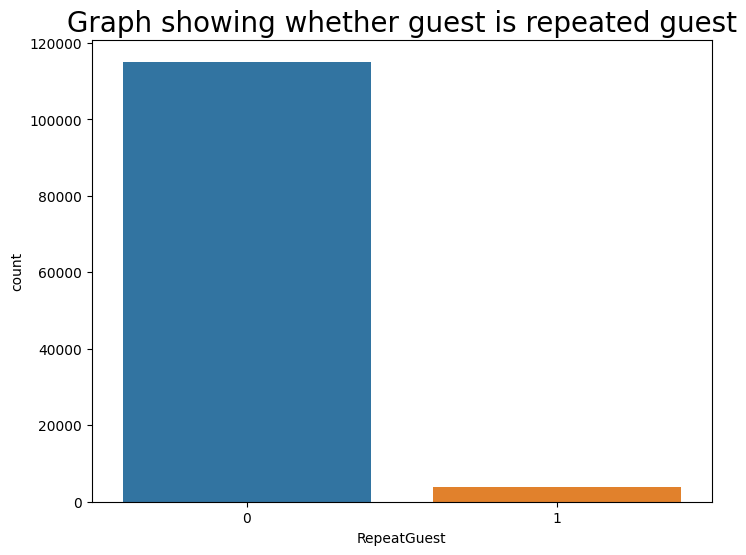

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = hotel, x = 'RepeatGuest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

In [ ]:
### Low number of repeated guests.
### A need to target repeated guests since they have booked before. **

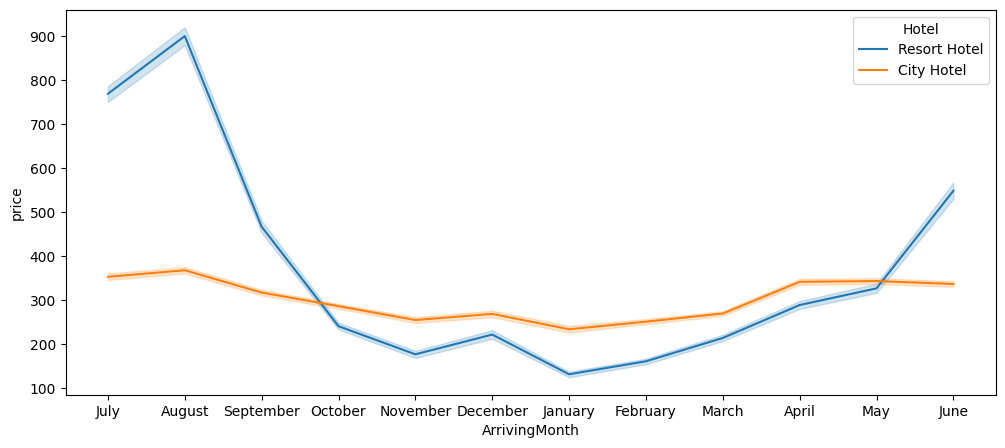

In [ ]:
# Resizing plot
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
hotel['adr_pp'] = hotel['ADR'] / (hotel['Adults'] + hotel['Children'])
actual_guests = hotel.loc[hotel["Canceled"] == '0']
actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])
sns.lineplot(data = actual_guests, x = 'ArrivingMonth', y = 'price', hue = 'Hotel')
plt.show()

In [ ]:
### Prices of resort hotel are much higher.
### Prices of city hotel do not fluctuate that much.

In [ ]:
###ADR: Average Daily Rate

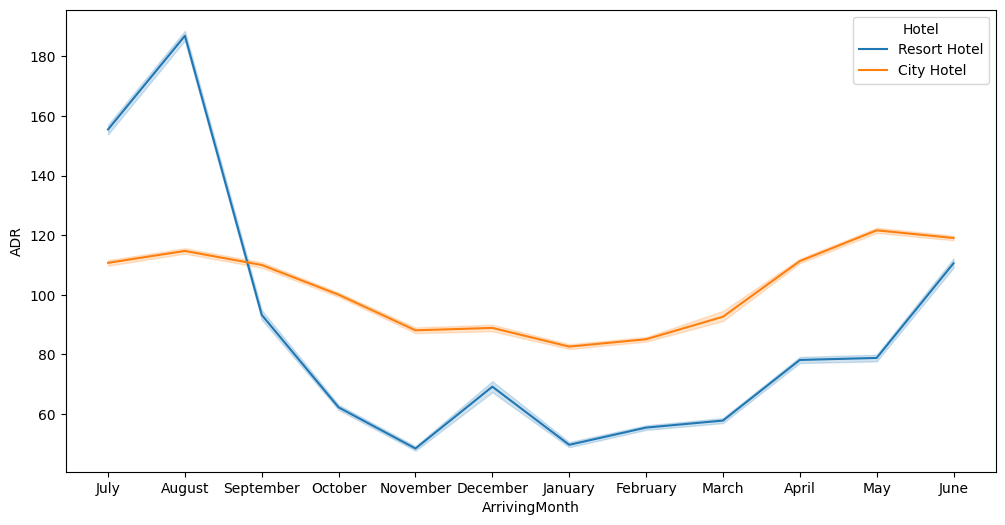

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data= hotel)
plt.show()

In [ ]:
### For Resort Hotel, ADR is more expensive during July, August & September and for City Hotel, ADR is slightly more during March, April & May.

In [ ]:
##Summary
### Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
### We also realise that the high rate of cancellations can be due high no deposit policies.
### We should also target months between May to Aug. Those are peak months due to the summer period.
### Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
### Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

In [ ]:
##Strategies to Counter High Cancellations at the Hotel
### Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
### Encourage Direct bookings by offering special discounts
### Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.